# Testing a Difference of Means

One of the most common statistical tests is whether two data sets come from distributions with the same means. The mean is special because of the Central Limit Theorem (see {doc}`Section 8.7.3.2<../08-random-variables/important-continuous-rvs>`) -- regardless of the type of distribution of the underlying data[^clt], the distribution of the sample mean will be approximately Normal if there are at least 10s of data points. This allows two approaches to conducting tests involving sample means: we can use bootstrap resampling or we can use analysis by applying the assumption that sample means are approximately Normal.  To understand how to apply the analytical approaches, we need to characterize the sample mean estimators and the test statistic, which is the difference between the sample mean estimators.

[^clt]: Actually the distribution will have to satisfy some mild restrictions, such as having finite mean and variance.

# Linear Combinations of Independent Gaussian RVs

Suppose we have two  data samples from different groups $\mathbf{X}=\{X_0,X_1,\cdots,X_{M-1}$ and $\mathbf{Y}=\{Y_0,Y_1,\cdots,Y_{N-1}\}$, where the data samples are assumed to be independent[^ci]. Let's first characterize the sample mean estimators. For conciseness, we present results for $\hat{\mu}_X$. The results for $\hat{\mu}_Y$ are analogous and are noted at the end of the analysis for $\hat{\mu}_X$.

We know from {doc}`Section 9.4<parameter-estimation>` that the sample mean estimator is unbiased. Thus, the mean of the sample mean estimator is the true mean. We will also need the variance of the sample mean estimator in our analysis. Let $\sigma_{X}^2$ be the variance of the $X_i$. Then the variance of the sample mean estimator is 
\begin{align*}
\operatorname{Var} \left[ \hat{\mu}_X \right] &= \operatorname{Var} \left[ \frac 1 M \sum_{i=0}^{M-1} X_i \right] \\
&= \frac 1 {M^2} \operatorname{Var} \left[  \sum_{i=0}^{M-1} X_i \right], \\
\end{align*}
where the second line of the equation follows from Property 3 of variance (see {doc}`Section 9.3.4<moments>`). Since the random variables in $\mathbf{X}$ are independent, we can apply Property 4 of variance to get
\begin{align*}
\operatorname{Var} \left[ \hat{\mu}_X \right] &= \frac 1 {M^2}  \sum_{i=0}^{M-1} \operatorname{Var} \left[  X_i \right] \\
&= \frac 1 {M^2}  \sum_{i=0}^{M-1} \sigma_{X}^2\\
&= \frac 1 {M^2}  M \sigma_{X}^2\\
&= \frac {\sigma_{X}^2} {M}  .
\end{align*}
The variance of the sample mean estimator decreases linearly with the number of samples. (This can be used to show that the sample mean estimator converges to the true mean as $M \rightarrow \infty$ if $\sigma_{X}^2$ is finite.)

The analysis above is sufficient to characterize $\hat{mu}_X$ and $\hat{\mu}_Y$:
\begin{align*}
\hat{\mu}_X \sim \mbox{Normal} \left(\mu_X, \frac{\sigma_X}{\sqrt{M}} \right) &&
\hat{\mu}_Y \sim \mbox{Normal} \left(\mu_Y, \frac{\sigma_Y}{\sqrt{N}} \right) 
\end{align*}


[^ci]: Actually, the data within each group are only *conditionally independent* given the group it belongs to.

To assess a difference in means, we will create a test statistic that is the difference between sample mean estimators. For convenience, we will considerr the case $T = \hat{\mu}_X - \hat{\mu}_Y$, but the result for $T = \hat{\mu}_Y - \hat{\mu}_X$ is almost identical. The mean of the test statistic is 
\begin{align*}
E[T] & = E\left[\hat{\mu}_X - \hat{\mu}_Y \right] \\
&= E\left[\hat{\mu}_X\right]  - E \left[\hat{\mu}_Y \right] && \mbox{(by linearity)} \\
&= \mu_X - \mu_Y &&\mbox{(the estimators are unbiased)}.
\end{align*}



To find the variance of $T$, we first rewrite the formula for the test statistic slightly, as $T = \hat{\mu}_X + (-1) \hat{\mu}_Y$. Since $\mathbf{X}$ and $\mathbf{Y}$ are independent, so are variables computed from them. Thus, 
\begin{align*}
\sigma_{T}^2 &= \operatorname{Var}[T] \\
& = \operatorname{Var}\left[\hat{\mu}_X + (-1) \hat{\mu}_Y \right] \\
& = \operatorname{Var}\left[\hat{\mu}_X \right] + 
\operatorname{Var} \left[(-1) \hat{\mu}_Y \right] 
&& \mbox{(by Property 4 of variance)}\\
& = \frac{\sigma_{X}^2}{M} +  (-1)^2\frac{\sigma_{Y}^2}{N}
&& \mbox{(from above and Property 3)}\\
& = \frac{\sigma_{X}^2}{M} +  \frac{\sigma_{Y}^2}{N} \\
\end{align*}

Importantly, a linear combination of independent Normal random variables is also a Normal random variable. Thus we have a characterization of the test statistic:
\begin{equation*}
T \sim \mbox{Normal} \left( \mu_X - \mu_Y, \sqrt{\frac{\sigma_{X}^2}{M} +  \frac{\sigma_{Y}^2}{N}} \right)
\end{equation*}


## Statistical Inference for a Difference of Sample Means *with Known and Equal Variances*

Consider the case where we know that the data come from distributions with the same variance, $\sigma^2$, which we know. Suppose we have samples from these distributions, 
\begin{align*}
\mathbf{x} = \left[ x_i, i=0,1,\dots,M-1 \right],
\end{align*}
and
\begin{align*}
\mathbf{y} = \left[ y_j, j=0,1,\dots,N-1 \right].
\end{align*}
Let the averages of the data be denoted by $\overline{\mathbf{x}}$ and $\overline{\mathbf{y}}$, and denote the true (but unknown) means of the distributions be $\mu_X$ and $\mu_Y$.


We can now easily conduct a NHST. The null hypothesis is that the data have the same mean and so $E[T]=0$.  The observed value of the test statistic $t = \overline{\mathbf{x}} - \overline{\mathbf{y}}$, which we assume below is greater than 0 -- if not, then interchange the role of $x$ and $y$.


Under the assumption that variances of the $X_i$ and $Y_k$ are both equal to $\sigma^2$, the variance of $T$ simplifies to 
\begin{align*}
\sigma_{T}^2  & = \frac{\sigma^2}{M} +  \frac{\sigma^2}{N} \\
 & = \sigma^2 \left( \frac{1}{M} +  \frac{1}{N} \right) \\
\end{align*}

Once we know the mean and variance of $T$, then the NHST is straight-forward application of the results in {doc}`Chapter 8<../08-random-variables/intro>`:

* For a one-sided hypothesis test, the $p$-value is
    
    $$
    P(T \geq t | H_0) = Q\left(\frac{t - \mu_T}{\sigma_T}\right) = Q\left(\frac{t}{\sigma \sqrt{\frac{1}{M}+\frac{1}{N}}}\right).
    $$
    
* For a two-sided NHST, the $p$ value is
    
    $$
    P(|T| \geq t | H_0) = 2 Q\left(\frac{t}{\sigma \sqrt{\frac{1}{M}+\frac{1}{N}}}\right).
    $$
Note that in both these cases, the only information that is needed is the observed value of the test statistic, the standard deviation of the data, and the number of samples in each group ($M$ and $N$).



## Binary Hypothesis Tests with *Unknown Variance*

In most cases, the variance(s) of the underlying distributions are not known and must be estimated from the data. The result of having to estimate the variance is that we can no longer treat the test statistic as Normal. Instead, the fact that we have to use an estimate for the variance will cause the distribution to spread out more than if we used a Normal distribution with that estimated variance, so that more of the probability is out towards the tails of the distribution.

Recall that if $\hat{mu}_X$ is Normal( $\mu_X, \sigma_X)$ , then 
\begin{align*}
\frac{ X  - \mu_X}{\sigma_X} \sim \mbox{Normal}(0,1).
\end{align*}

If we have to replace the true mean and variance by their estimates, then the distribution changes. Consider a case where we have $N$ samples with an unbiased variance estimate, 
$S_{N-1}$. Then the distribution of

$$\frac{\hat{\mu}-\mu}{S_{N-1}/\sqrt{N}}$$

has a **Student’s $t$-distribution with $\nu = N-1$ degrees of freedom (dof)**.


The density and distribution functions are complicated and omitted here, but you can find them on the [Wikipedia page for Student's $t$-distribution](https://en.wikipedia.org/wiki/Student's_t-distribution). Fortunately for us, SciPy.stats has the functions we will need in our analysis built in. An additional point of good news is that unlike the Gaussian distribution, the distribution function for Student’s t-distribution is in closed form for several values of the dof parameter.

Let's compare the standard Normal(0,1) density to the Student's $t$ density with different dofs:

In [13]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

norm=stats.norm()
t1=stats.t(1)
t2=stats.t(2)
t5=stats.t(5)
tinf=stats.t(100000)

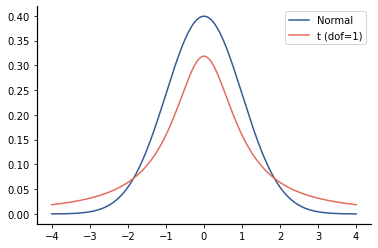

In [17]:
x=np.linspace(-4,4,1000)
plt.plot(x,norm.pdf(x),label='Normal')
plt.plot(x,t1.pdf(x),label='t (dof=1)')
plt.legend();

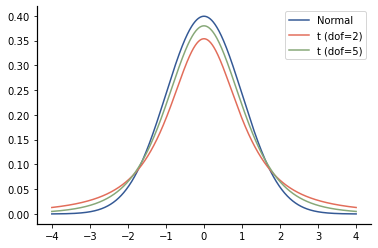

In [18]:
x=np.linspace(-4,4,1000)
plt.plot(x,norm.pdf(x),label='Normal')
plt.plot(x,t2.pdf(x),label='t (dof=2)')
plt.plot(x,t5.pdf(x),label='t (dof=5)')
plt.legend();

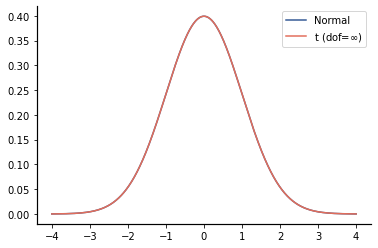

In [19]:
x=np.linspace(-4,4,1000)
plt.plot(x,norm.pdf(x),label='Normal')
plt.plot(x,tinf.pdf(x),label='t (dof=$\infty$)')
plt.legend();

For small dofs, the Student's $t$ density has much more probability in the tails of the distribution than the Normal density does. As $N \rightarrow \infty$, the Student's $t$ density converges to the Normal density.

## Example: Analytical Test on Difference of Means (T-Test)

Conduct an **analytical** binary hypothesis test on whether urban and rural populations have different firearms mortality rates.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("data/firearms-urban.csv")
df.head()

,STATE,RATE-2014,Percent Urban
0,AL,16.9,59.0
1,AK,19.2,66.0
2,AZ,13.5,89.8
3,AR,16.6,56.2
4,CA,7.4,95.0


Recall the data "firearms-urban.csv" where the columns of interest for this investigation are:

* **RATE-2014**: The firearms mortality rate by state from 2014. 

* **Percent Urban**: The percentage of the total population in urban areas, from https://www.icip.iastate.edu/tables/population/urban-pct-states. Although this data is 2010, it should be sufficiently accurate for our purposes.

In [3]:
# Use the STATE column as the index
df= df.set_index("STATE")
df.loc['FL']

RATE-2014        11.5
Percent Urban    91.2
Name: FL, dtype: float64

In [6]:
df['Percent Urban'].mean()

73.59

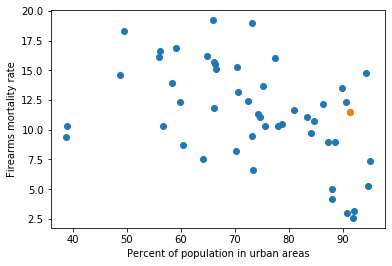

In [18]:
plt.scatter(df['Percent Urban'],df['RATE-2014'])
plt.scatter(df.loc['FL']['Percent Urban'],df.loc['FL']['RATE-2014'])
plt.xlabel('Percent of population in urban areas')
plt.ylabel('Firearms mortality rate');

In [19]:
urban=df[df['Percent Urban']>80]['RATE-2014']
rural=df[df['Percent Urban']<=80]['RATE-2014']
pooled=df['RATE-2014']

In [21]:
urban.mean(),rural.mean()

(8.677777777777777, 12.993750000000002)

In [23]:
np.median(urban),np.median(rural)

(9.35, 12.8)

In [22]:
diff=rural.mean()-urban.mean()
diff

4.315972222222225

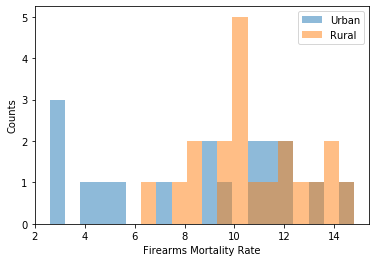

In [20]:
counts,mybins,patches=plt.hist(urban,bins=20,alpha=0.5,label="Urban")
plt.hist(rural,bins=mybins,alpha=0.5,label="Rural")
plt.xlabel("Firearms Mortality Rate");plt.ylabel("Counts"); plt.legend();

* Let's construct a **two-sided binary hypothesis test** using analytical techniques and determine the probability of such a large difference in means under the null hypothesis.

The data comes from a single distribution, which implies same means and same variances.

So, we will use the **T-random variable** to model this. We know: mean of $T$ is 0, and we need to calculate the variance from the data.

In [24]:
pooled_mean=pooled.mean()
pooled_mean

11.440000000000003

In [26]:
np.sum((pooled-pooled_mean)**2)/(len(pooled)-1)

17.220408163265304

In [27]:
pooled_var=np.var(pooled,ddof=1)
pooled_var

17.22040816326531

In [28]:
# We need to caLculate the variance of the difference of sample mean estimators
sm_var=pooled_var*(1/len(urban)+1/len(rural))
sm_var

1.4948270975056694

In [29]:
# Last parameter of T: degrees of freedom
dof = len(pooled)-2
dof = (len(urban)-1) + (len(rural)-1)

**Way 1:**

In [40]:
myt=stats.t(dof)

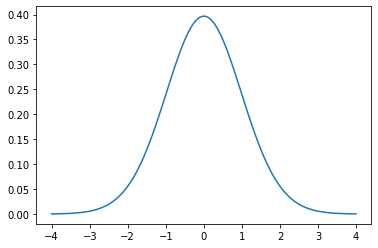

In [41]:
t=np.linspace(-4,4,100)
plt.plot(t, myt.pdf(t));

In [34]:
diff/np.sqrt(sm_var)

3.530068720144798

In [35]:
#1-sided test
myt.sf(diff/np.sqrt(sm_var))

0.0004639918961189169

In [36]:
# 2-sided test
2*myt.sf(diff/np.sqrt(sm_var))

0.0009279837922378338

In [37]:
# other 1-sided
myt.cdf(-diff/np.sqrt(sm_var))

0.0004639918961189169

**Way 2:**

In [42]:
myt=stats.t(dof,scale=np.sqrt(sm_var))
# We set the variance of the T random variable here, rather than scaling in the .sf() method

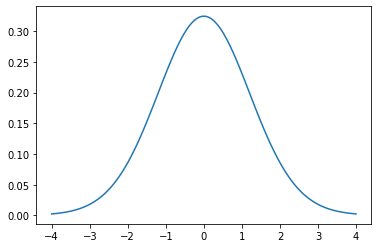

In [43]:
t=np.linspace(-4,4,100)
plt.plot(t, myt.pdf(t));
# Note that this is slightly different than before
# because of the increased variance

In [44]:
# 1-sided test
myt.sf(diff)
# We don't need to scale diff any more!
# I feel like this is easier to understand

0.0004639918961189169

In [45]:
# 2-sided test
2*myt.sf(diff)

0.0009279837922378338

In [46]:
# other 1-sided
myt.cdf(-diff)

0.0004639918961189169

# In-Class Assignment

Use the Student's $T$ random variable to determine a 95% confidence interval for the mean difference under the null hypothesis. Is the resulting confidence interval compatible with the observed difference of means?

*Hint:* The inverse CDF function in ```scipy.stats``` is called the Percent point function (PPF) and is given by the ```ppf``` method of random variable objects.